# Welcome to the Data Science Gym!

Sharpen your data science skills by just *doing* data science.

<br>

### Workout Overview

**ID:** <a href="https://github.com/dskarbrevik/Data-Science-Gym">DSG2DC1</a>

**Type:** Data Collection

**Challenge:** Collect game data from Riot's League of Legends computer game and make an interesting finding about the collected data.

**Data theme:** Game data

**Data types:** numerical, categorical

**Data size:** Small

**Special System requirements:** None 

**Difficulty:** &#11088;

[Note: If this workout doesn't seem like a good fit for you at the moment, the <a href="https://github.com/dskarbrevik/Data-Science-Gym">Data Science Gym</a> has other workouts that may be a better fit.]

<br>
<hr style="background-color: black; padding: 1px;">
<br>

## SIGN-IN TO THE GYM!

**Username:** David Skarbrevik

**Date:** 4/4/2018

**Favorite video game:** Ocarina of Time!

<br>
<hr style="background-color: black; padding: 1px;">
<br>

### BASIC GYM RULES (everything you need to know)

**1)** You have a maximum of **3 hours to complete "the challenge" of this workout** in this gym.

**2)** Start your timer immediately after reading these rules.

**3)** You don't have to use all 3 hours, but you should spend **at least 1 full hour** in this gym or else your Data Science muscles might not get much bigger :(

**4)** As long as you are the one typing into this notebook, you may use any resource you like (Python libraries, StackOverflow, phone a friend, etc.). 

**5)** Anytime you Google something that helps you out, put a link to it in the Resources section at the bottom of this notebook (doesn't matter how simple it is).

<br>

**Note:** These five rules are the only firm instructions you will get. The workout is otherwise very open-ended on purpose.

<br>

<a id="toc"></a>

<br>

## READY?... ok! Start the timer and continue to the Introduction section of the workout.

[Execute the code block below for a convenient timer]

In [14]:
# HI! I'm a super helpful timer! good luck on your workout!
# You can pause me whenever you need. 
# I'll notify you when each hour passes so you don't lose track of time!
from utils import Timer, show
timer = Timer() 
show(timer)

<IPython.core.display.Javascript object>

A Jupyter Widget

A Jupyter Widget

<br>
***

## Workout Routine

<br>

<ol>
    <li><a href="#section1"><big>Introduction</big></a></li>
    <br>
    <li><a href="#section2"><big>Data Collection (and minimal cleaning)</big></a> [bulk of your time here]</li>
    <br>
    <li><a href="#section3"><big>Data Analysis</big></a></li>
    <br>
    <li><a href="#section4"><big>Conclusion</big></a></li>
    <br>
    <li><a href="#section5"><big>Resources</big></a> [a place for you to record useful links]</li>    
</ol>

<br>
***

<div align="right">
    <a href="#toc">back to top</a>
</div>
<a id='section1'></a>

## 1) Introduction

Riot is the maker of a game called <a href="https://en.wikipedia.org/wiki/League_of_Legends">League of Legends</a>. It is an extremely successful (financially and in terms of user base size) as of this writing (2018). The "Gameplay" section of the linked Wikipedia article should have all the information (and more) that you might need to get familiar with the rules of the game and what matters. 

This workout is only 1-star difficulty because Riot has a simple and easy to use API for getting match information from their database. There are also a couple of Python wrappers for their API that are easy to use.

<br>

### THE CHALLENGE:

OK so what exactly do you need to do?

**1) Get data from 10,000 different game matches.**

**2) Once you have the data, make 1 interesting remark about the data.** You can define what "interesting" means but it should be at least slightly more involved than `print("Wow the data has {} rows!".format(df.shape[0]))` This may require you to do some basic cleaning of the data.

<br>

**Useful tools for this workout :**

Python wrappers for Riot's API:

* <a href="https://github.com/meraki-analytics/cassiopeia">Cassiopeia</a>

* <a href="https://github.com/pseudonym117/Riot-Watcher">Riot Watcher</a>

Python data cleaning library:
* Pandas


You are not obligated to use any of the above libraries, but they may be useful.

<br>
***
<br>

<div align="right">
    <a href="#toc">back to top</a>
</div>
<a id='section2'></a>

## 2) Data Collection

Time to get started! The bulk of your time should be spent in this section. 

By the end of this section you should have data on 10,000 unique League of Legends matches in a form that it is at least somewhat readable by human eyes. Because you'll likely use the Riot API, the data will already be in a nice clean format but it may be nice to put the data in something like a Pandas dataframe.

***

Libraries I make use of (will add to this as I go on in the exercise:

In [1]:
import numpy as np
import re
import pandas as pd
from collections import defaultdict

import cassiopeia as cass

### Step 1) Get up and running with Riot's API

To start I'm going to get into the Riot API. We'll try to focus on one specific person's account for now and see where we might want to go from there.

In [5]:
cass.set_riot_api_key("RGAPI-b4bd7b74-41e1-47ea-9e7c-421e1bcfff2a") # API key that you get from your account
cass.set_default_region("NA")

In [25]:
summoner = cass.get_summoner(name="SpaceManateeh")
print("{name} is a level {level} summoner on the {region} server.".format(name=summoner.name,
                                                                          level=summoner.level,
                                                                          region=summoner.region))

Making call: https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-name/SpaceManateeh
SpaceManateeh is a level 45 summoner on the Region.north_america server.


### Step 2) Play around with match data

So now we've gotten into the API and accessed "Msendak" as a summoner. We are really after match data, so how can we get access to that? Let's look through the docs for a little bit...

In [33]:
match_history = summoner.match_history
total_matches = len(match_history)

print("\n")
print("Total Matches for user {name} = {matches}".format(name=summoner.name, matches=total_matches))

Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=0&endIndex=100
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=100&endIndex=200
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=200&endIndex=300
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=300&endIndex=400
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=400&endIndex=500
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=500&endIndex=600
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=600&endIndex=700
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/206742775?beginIndex=700&endIndex=800
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-acco

OK so we see that this summoner has close to 3000 matches in their history. Let's try to get a date range on these matches.

In [18]:
total_matches = len(match_history)
first_match = match_history[total_matches-1]
latest_match = match_history[0]

time_first_match = re.search("\d+-\d+-\d+",str(first_match.creation))[0]
time_latest_match = re.search("\d+-\d+-\d+",str(latest_match.creation))[0]

print("{name}'s First Match Ever: {date}".format(name=summoner.name, date=time_first_match))
print("{name}'s Most Recent Match: {date}".format(name=summoner.name, date=time_latest_match))

MSendak's First Match Ever: 2015-04-10
MSendak's Most Recent Match: 2018-04-06


Notice this is about three years. Because LoL is much older than three years (and I personally know this account should have matches older than three years) I am suspicious of our finding.

After <a href="https://discussion.developer.riotgames.com/questions/5184/how-far-back-can-i-get-match-history-from-the-api.html">asking</a> on the Riot API discussion boards, it turns out that Riot only saves data for the API for three years. So we should just keep in mind that all analysis we do is not across the lifespan of a user unless that user's account is less than three years old.

We have a good way to get the date and time of a match now. What can we do next? Maybe getting more data on a specific game would be interesting... let's look at the docs to see what we can get.

<a href="http://cassiopeia.readthedocs.io/en/latest/_modules/cassiopeia/core/match.html#Match">Here</a> is a really useful piece of doc for this Python Riot API wrapper. It includes all the methods for the "Match" class type.

In [6]:
# get match id
first_match.id

1786375306

In [14]:
# get match region
str(first_match.region).split("Region.")[1]

'north_america'

In [8]:
# get game duration
first_match.duration

Making call: https://ddragon.leagueoflegends.com/realms/na.json
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1786375306


datetime.timedelta(0, 2034)

In [10]:
teams = latest_match.teams

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2754477713


### Step 3) Turn our data into a Pandas dataframe

Now that we've accessed some data from a single match we may find it useful to have all this data in a format that's easier to work with for future analysis (read: Pandas dataframe). So let's see if we can get that up.

First we'll want to get some helper methods up to generate the columns of our dataframe.

In [10]:
#generate a dict of match dates from a single summoner

def summoner_to_df(summoner):

    # make sure that we're getting a summoner object
    if str(type(summoner)) != "<class 'cassiopeia.core.summoner.Summoner'>":
        raise Exception("Summoner_to_df requires {} type input.".format("<class 'cassiopeia.core.summoner.Summoner'>"))

    matches = summoner.match_history

    data_dict = defaultdict(lambda:[])
    total_matches = len(matches)
    
    # gather all the data from matches in this for loop
    for i in range(total_matches):
        
        player_data = []
        
        for player in matches[i].participants:
            player_name = str(player.summoner).split("name=")[1].strip(">")
            if player_name == "?":
                continue
            else:
                player_data.append(player_name)
        
        
        data_dict["players"].append(player_data)
        
        data_dict["id"].append(matches[i].id)
        data_dict["date"].append(re.search("\d+-\d+-\d+",str(matches[i].creation))[0])
        data_dict["time"].append(re.search("\d+:\d+:\d+",str(matches[i].creation))[0])
        data_dict["duration"].append(matches[i].duration)
        data_dict["region"].append(str(matches[i].region).split("Region.")[1])
     
    # convert to pandas dataframe
    df = pd.DataFrame.from_dict(data_dict)
        
    return df  
        

[Note: This function requires a lot of calls to the API which will hit the rate limit causing a slow down. So ultimately this will take quite some time to finish running.]

In [11]:
df = summoner_to_df(summoner)

Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=0&endIndex=100
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=100&endIndex=200
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=200&endIndex=300
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=300&endIndex=400
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=400&endIndex=500
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=500&endIndex=600
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=600&endIndex=700
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-account/200658749?beginIndex=700&endIndex=800
Making call: https://na1.api.riotgames.com/lol/match/v3/matchlists/by-acco

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2708662377
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2708655444
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2708620516
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707990325
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707672881
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707611124
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707570465
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707344127
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707288301
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2707132990
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2706427168
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2706238000
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2706212351
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2641285453
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640796242
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640784437
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640733038
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640694543
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640646443
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640606668
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640591836
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640576170
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640535721
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640532844
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640530788
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2640520590
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2616953950
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2616941125
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2616896116
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2616883612
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2616308248
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2616322503
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2615993008
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2615216671
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2615214523
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2615034076
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2614785175
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2614379342
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2614580888
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2598104275
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2598104078
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2596496021
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2596479308
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2596491697
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2595939909
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2595882821
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2594855250
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2594436645
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2593980794
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2593961416
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2593458392
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2592754936
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570726153
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570721751
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570709989
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570667110
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570662775
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570567933
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570562127
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570516928
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570522369
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570520490
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570399176
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570492306
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2570368405
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2523208045
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2523196885
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2522902518
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2522787243
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2522772984
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2521034710
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2521034050
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2520394923
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2520392727
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2519016066
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2519013799
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2519011422
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2518966285
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2492515855
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2492367260
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2492410404
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2492337790
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2492336716
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491477822
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491476286
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491461939
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491291054
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491142322
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491028764
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2491016953
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2490630148
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2466350452
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2466339794
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2465832806
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2465787586
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2465738982
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2464840948
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2464820262
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2463842595
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2463291573
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2463300013
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2463239354
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2462443049
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2462210981
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2313204603
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2313195305
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2313085872
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2312854075
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2312767943
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2312794938
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2312592841
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2312591616
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2312489820
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2311667543
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2311354800
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2311328276
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2310692034
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2292282604
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2292079792
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2291566557
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2291323714
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2291311831
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2291254140
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2290225655
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2290189235
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2290233510
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2290192300
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2289746606
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2289703093
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2289633415
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2250897663
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2250910014
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2250880391
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2184688662
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2176138972
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2176122151
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2176030391
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2175968240
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2175893878
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2175339976
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2175185958
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2175051066
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2174667376
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2104674494
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2104624717
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2103809354
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2103784071
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2103782520
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2102955413
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2102022251
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2101973199
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2101045599
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2101028677
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2101030841
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2100957135
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2100178775
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2086601674
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2086600223
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2086555897
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2086532551
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2086094802
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2085844319
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2085799654
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2084835449
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2084820862
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2083923102
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2083229425
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2083248600
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2083227912
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2068205430
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2068165110
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2068142798
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067188926
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067200041
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067147505
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067151527
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067114661
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067048839
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2067033526
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2066949461
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2066896028
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2066643884
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2052643860
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2052641008
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2052500003
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051518436
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051516715
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051530013
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051521744
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051467669
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051448818
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051449800
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051289903
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051254827
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2051209588
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038600500
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038585928
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038593363
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038582713
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038574064
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038493478
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038283422
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038352913
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038330266
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038301096
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038237522
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2038144998
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2037914100
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023922896
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023920376
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023897483
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023879084
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023859641
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023161781
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2023134617
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2022806023
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2022796246
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2022766101
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2022649292
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2022630108
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2021812600
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2010421819
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2009144765
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2009095812
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2009048191
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2008924530
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2008584819
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2008574659
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2008263474
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2008248253
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2008206753
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2007959568
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2007928603
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2007727031
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1986685420
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1986652524
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1986601135
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1986437137
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1986295462
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1986147325
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1985660111
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1985477987
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1984697936
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1984479223
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1984418026
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1984398170
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1983406621
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1949687741
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1949536149
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1949551376
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1949408738
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1949425855
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1948472800
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1948450786
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1948390573
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1948333497
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1947983504
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1947467855
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1947431223
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1947416196
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1932141663
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1932053344
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1931972142
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1931807777
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1931794767
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1931537454
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1931513926
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1930920357
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1930736227
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1930658997
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1929106233
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1929104255
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1928970945
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906901735
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906796933
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906524892
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906511916
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906500090
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906258576
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906242709
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1906162500
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1905379768
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1905371469
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1905344126
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1905294072
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1905068445
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1877911937
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1877867157
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1877447565
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1876931146
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1876881377
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1876348082
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1876350978
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1876141650
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1875644653
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1875447289
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1875315814
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1875098927
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1875096699
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1854000873
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1853929190
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1853907251
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1853770843
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1853379393
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1853299237
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1852342979
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1852176538
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1851401269
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1851320685
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1851245220
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1851217705
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1850925915
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1827814009
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1826717916
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1826714427
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1826697429
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1826478158
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1825593285
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1825475556
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1824996802
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1824348284
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1824341603
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1824320657
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1824293606
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1824246280
Making call: https://na1.

Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1787518508
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1787321145
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1786815023
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/1786711333


In [12]:
df.head()

,date,duration,id,region,time
0,2018-04-02,00:16:37,2754477713,north_america,22:40:41
1,2018-04-01,00:16:20,2753321132,north_america,18:05:22
2,2018-04-01,00:17:35,2753074743,north_america,05:18:27
3,2018-04-01,00:27:45,2753033258,north_america,04:38:56
4,2018-04-01,00:18:32,2753016034,north_america,04:15:23


In [14]:
df.shape

(2819, 5)

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_timedelta(df['time'])
df['date'] = df['date'].add(df['time'])
df = df.drop(['time'], axis=1)

In [16]:
df.head()

,date,duration,id,region
0,2018-04-02 22:40:41,00:16:37,2754477713,north_america
1,2018-04-01 18:05:22,00:16:20,2753321132,north_america
2,2018-04-01 05:18:27,00:17:35,2753074743,north_america
3,2018-04-01 04:38:56,00:27:45,2753033258,north_america
4,2018-04-01 04:15:23,00:18:32,2753016034,north_america


In [34]:
match = match_history[0]

match_time = re.search("\d+-\d+-\d+",str(latest_match.creation))[0]

print("One of {name}'s Matches from {date}".format(name=summoner.name, date=match_time))

One of SpaceManateeh's Matches from 2018-04-06


In [35]:
players = match.participants
for player in players:
    player_name = str(player.summoner).split("name=")[1].strip(">")
    print("Player = {name} ; Team = {side}".format(name=str(player.summoner).split("name=")[1].strip(">"), side=player.side))

Question mark player is Jose I think
Making call: https://na1.api.riotgames.com/lol/match/v3/matches/2759507865
Making call: https://na1.api.riotgames.com/lol/summoner/v3/summoners/by-account/206742775
Player = ? ; Team = Side.blue
Player = mountedmidget ; Team = Side.blue
Question mark player is Jose I think
Player = ? ; Team = Side.blue
Player = paid for it ; Team = Side.blue
Player = GreedOverNeed2 ; Team = Side.blue
Player = King LeAhmed ; Team = Side.red
Player = legends10 ; Team = Side.red
Player = A Dark Flight ; Team = Side.red
Player = ItsOnSight ; Team = Side.red
Player = CactusSlayer ; Team = Side.red


C:\Users\skarb\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: generator 'SearchableLazyList.__iter__' raised StopIteration
  


Making call: https://na1.api.riotgames.com/lol/match/v3/timelines/by-match/2759507865


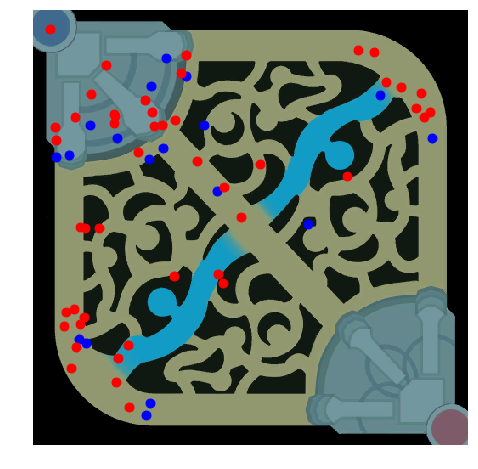

In [36]:
match.kills_heatmap()

<br>
***
<br>

<div align="right">
    <a href="#toc">back to top</a>
</div>
<a id='section3'></a>

## 3) Data Analysis 

Now that you have your data in a somewhat readable shape, **make one semi-intelligent analytical remark about the data.** 





In the end I did not have time to collect the full 10,000 matches though given another hour I likely would have. I collected about 1,000 matches and it is very easy. The difficult part is deciding which players to get matches from to build a meaningful database. You want it to be relatively random, but at the same time, you don't have a list of the names of every player

<br>
***
<br>

<div align="right">
    <a href="#toc">back to top</a>
</div>
<a id='section4'></a>

## 4) Conclusion -- (do this after time is up)

**Put a small sample of your data and the 1 interesting finding you have here.**

If you didn't get far enough to have an "interesting finding". Just remark on what work you were able to accomplish and what the most difficult/time-consuming problems you faced were. If you think you'd do things a little differently next time, write a little about that as well.

Also remarks you'd like to make about the challenges you face, what you learned, what makes the problem or data interesting or not interesting. Just a little space to reflect on the workout. Consider looking through the resources you used below in reflecting on what you learned!

<br>
***
<br>

<div align="right">
    <a href="#toc">back to top</a>
</div>
<a id='section5'></a>

## 5) Resources

This is where you can list links to anything you needed to google that you found very helpful such as StackOverflow answers or parts of a Python library's documentation. It's a good way to reflect on what really challenged you and what you learned in this workout.

EXAMPLE:

1) <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html">How to make random numbers with numpy</a>



<br>

***
<br>

## That's it! You completed the workout!


If you felt like you spent most of your time googling then this workout may have been a little too difficult for you right now. Try an easier workout next time! But also copy/pase the "Resources" section you built and save it somewhere so you can review or have easy access to that helpful info in the future!

OR

If you're proud of what you accomplished, put it in your own GitHub repo to show off to recruiters, friends, parents, and pets! If you do, please link to my repo in your README :D)